In [1]:
%cd ../..

f:\DR\Stock-Market-Prediction\src


In [2]:
import tensorflow as tf

from lstm_normalize import prepare_data, add_lags, split_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(5959,)
(5959, 17)
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Change              float64
Direction             int64
MA10                float64
MA20                float64
MA50                float64
MA100               float64
RSI                 float64
Stochastic_K        float64
Stochastic_D        float64
Short_Term_Trend      int64
Long_Term_Trend       int64
dtype: object


,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,MA50,MA100,RSI,Stochastic_K,Stochastic_D,Short_Term_Trend,Long_Term_Trend
Date,,,,,,,,,,,,,,,,,
2000-05-24,1373.859985,1401.750000,1361.089966,1399.050049,1399.050049,1152300000,25.190063,1,1421.276001,1426.065509,1454.346997,1428.297998,44.368469,23.745746,29.372265,0,1
2000-05-25,1399.050049,1411.650024,1373.930054,1381.520020,1381.520020,984500000,-17.530029,0,1418.646997,1421.895508,1454.134597,1427.560999,41.539809,19.487574,22.178108,0,1
2000-05-26,1381.520020,1391.420044,1369.750000,1378.020020,1378.020020,722600000,-3.500000,0,1414.353003,1418.175006,1452.525598,1427.346998,40.978078,22.968362,22.067228,0,1
2000-05-30,1378.020020,1422.449951,1378.020020,1422.449951,1422.449951,844200000,44.429932,1,1411.362000,1415.885004,1451.685198,1427.550398,50.186817,30.103998,24.186645,1,1
2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,-1.839966,0,1406.817993,1414.600500,1450.964597,1427.721898,49.838139,42.021155,31.697838,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,7.500000,1,4816.775049,4781.978076,4677.269023,4507.758813,72.932465,92.601030,93.015869,2,2
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,2.060059,1,4827.848047,4787.447583,4686.857432,4511.510815,72.142640,90.749789,91.389010,2,2
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,34.979980,1,4842.258057,4794.676587,4695.502031,4515.821816,75.458828,95.820406,93.057075,2,2


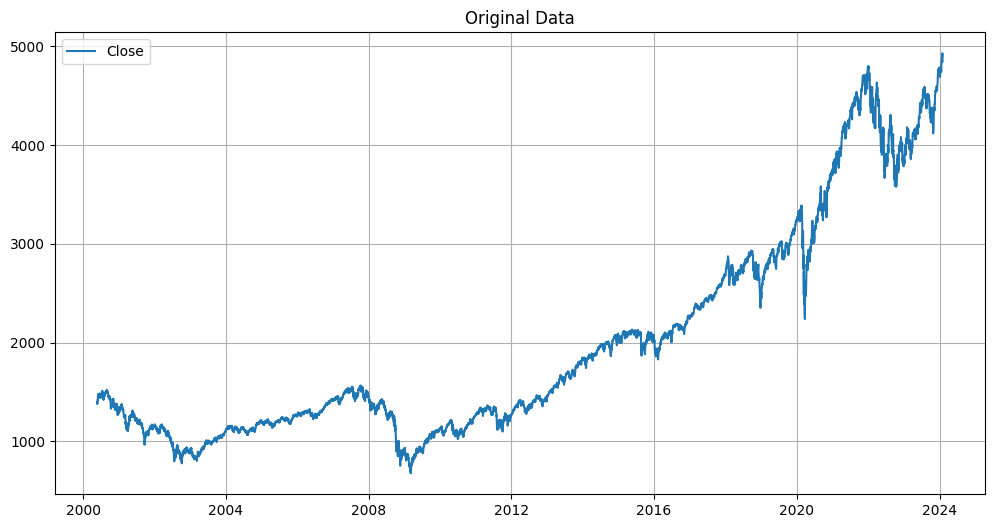

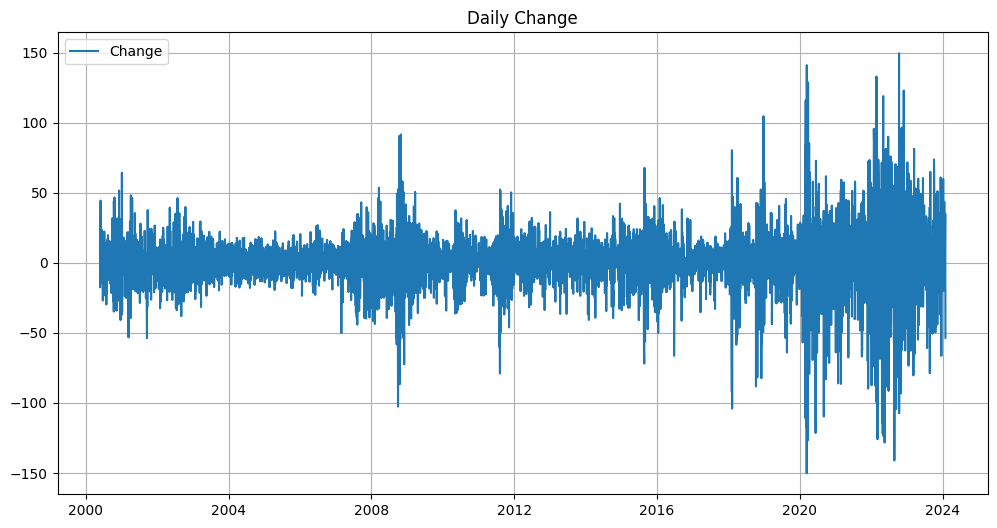

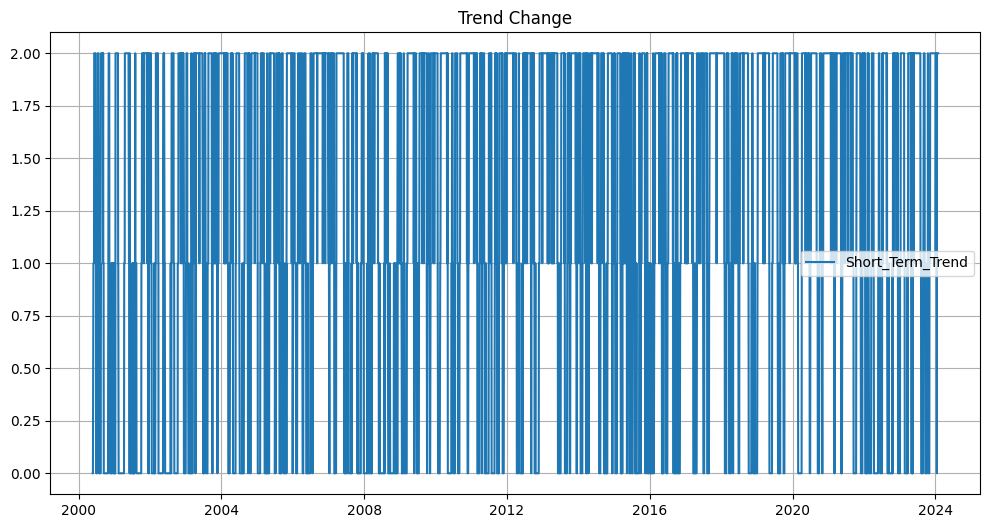

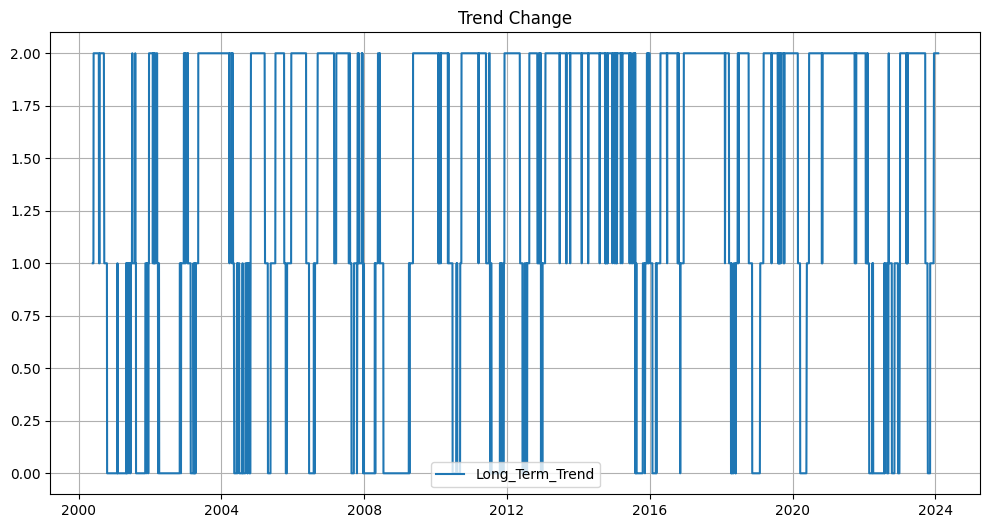

In [3]:
data, target = prepare_data(SP500_TICKER)


# Show data
print(target.shape)
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])

plt = config_chart('Trend Change')
plt.plot(data.Short_Term_Trend)
plt.legend(['Short_Term_Trend'])

plt = config_chart('Trend Change')
plt.plot(data.Long_Term_Trend)
plt.legend(['Long_Term_Trend'])

data

---

## For add_lags function

In [4]:
data = add_lags(data)


# Show data
data

,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,...,MA100,RSI,Stochastic_K,Stochastic_D,Short_Term_Trend,Long_Term_Trend,lag_1,lag_2,lag_3,lag_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-05-31,1422.439941,1434.489990,1415.500000,1420.599976,1420.599976,960500000,-1.839966,0,1406.817993,1414.600500,...,1427.721898,49.838139,42.021155,31.697838,1,1,44.429932,-3.500000,-17.530029,25.190063
2000-06-01,1420.599976,1448.810059,1420.599976,1448.810059,1448.810059,960100000,28.210083,1,1406.918994,1416.286005,...,1427.795299,54.975138,63.608080,45.244411,1,2,-1.839966,44.429932,-3.500000,-17.530029
2000-06-02,1448.810059,1483.229980,1448.810059,1477.260010,1477.260010,1162400000,28.449951,1,1410.923999,1419.670508,...,1427.991899,59.481733,76.600848,60.743361,1,2,28.210083,-1.839966,44.429932,-3.500000
2000-06-05,1477.260010,1477.280029,1464.680054,1467.630005,1467.630005,838600000,-9.630005,0,1416.992004,1421.420508,...,1428.282599,57.387881,87.529620,75.912849,1,2,28.449951,28.210083,-1.839966,44.429932
2000-06-06,1467.630005,1471.359985,1454.739990,1457.839966,1457.839966,950100000,-9.790039,0,1422.704004,1423.104004,...,1428.538499,55.258260,87.184118,83.771528,1,2,-9.630005,28.449951,28.210083,-1.839966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,7.500000,1,4816.775049,4781.978076,...,4507.758813,72.932465,92.601030,93.015869,2,2,-20.010254,7.800293,-2.989746,43.530273
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,2.060059,1,4827.848047,4787.447583,...,4511.510815,72.142640,90.749789,91.389010,2,2,7.500000,-20.010254,7.800293,-2.989746
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,34.979980,1,4842.258057,4794.676587,...,4515.821816,75.458828,95.820406,93.057075,2,2,2.060059,7.500000,-20.010254,7.800293


---
## For split_data function

In [5]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

,Open,High,Low,Close,Adj Close,Volume,Change,Direction,MA10,MA20,...,MA100,RSI,Stochastic_K,Stochastic_D,Short_Term_Trend,Long_Term_Trend,lag_1,lag_2,lag_3,lag_4
Date,,,,,,,,,,,,,,,,,,,,,
2000-05-31,0.175001,0.174516,0.176189,0.175018,0.175018,0.054452,0.494997,0.0,0.167967,0.166469,...,0.159989,0.495553,0.415443,0.312243,0.5,0.5,0.649353,0.489459,0.442655,0.585169
2000-06-01,0.174567,0.177897,0.177389,0.181653,0.181653,0.054416,0.595244,1.0,0.167992,0.166883,...,0.160008,0.565877,0.633357,0.450557,0.5,1.0,0.494997,0.649353,0.489459,0.442655
2000-06-02,0.181210,0.186023,0.184027,0.188345,0.188345,0.072641,0.596044,1.0,0.168954,0.167714,...,0.160061,0.627571,0.764515,0.608804,0.5,1.0,0.595244,0.494997,0.649353,0.489459
2000-06-05,0.187910,0.184618,0.187762,0.186080,0.186080,0.043471,0.469009,0.0,0.170413,0.168144,...,0.160138,0.598907,0.874838,0.763689,0.5,1.0,0.596044,0.595244,0.494997,0.649353
2000-06-06,0.185642,0.183221,0.185423,0.183777,0.183777,0.053515,0.468475,0.0,0.171785,0.168558,...,0.160206,0.569753,0.871350,0.843928,0.5,1.0,0.469009,0.596044,0.595244,0.494997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057,0.992057,0.330118,0.526155,1.0,0.987496,0.993712,...,0.981642,0.811709,0.926033,0.938314,1.0,1.0,0.434381,0.527157,0.491161,0.646352
2024-01-26,0.991292,0.994240,0.991811,0.991306,0.991306,0.270026,0.508007,1.0,0.990158,0.995056,...,0.982643,0.800896,0.907345,0.921704,1.0,1.0,0.526155,0.434381,0.527157,0.491161
2024-01-29,0.992243,0.999580,0.993206,1.000000,1.000000,0.285499,0.617828,1.0,0.993621,0.996831,...,0.983793,0.846294,0.958531,0.938735,1.0,1.0,0.508007,0.526155,0.434381,0.527157


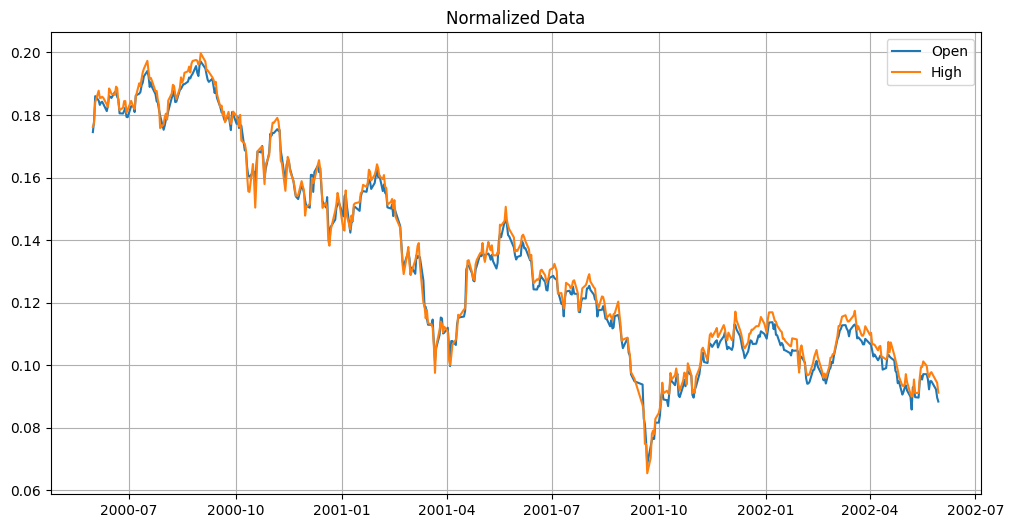

In [6]:
data = normalize_data(data)


# Show data
plt = config_chart('Normalized Data')
plt.plot(data['High'][0:500])
plt.plot(data['Low'][0:500])
plt.legend(['Open', 'High', 'Low', 'Close'])

data

----

## For **prepare_sequences** function

In [7]:
print(data)

data, target = prepare_sequences(data, target)

# Show data
print(data.shape)
print(data[0])
# print(x)

# print(y.shape)
# print(y[0])
# print(y)

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 0])
# plt.plot(y_dates[0], y[0, :, 0])
# plt.legend(['Price X', 'Price Y'])


                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2000-05-31  0.175001  0.174516  0.176189  0.175018   0.175018  0.054452   
2000-06-01  0.174567  0.177897  0.177389  0.181653   0.181653  0.054416   
2000-06-02  0.181210  0.186023  0.184027  0.188345   0.188345  0.072641   
2000-06-05  0.187910  0.184618  0.187762  0.186080   0.186080  0.043471   
2000-06-06  0.185642  0.183221  0.185423  0.183777   0.183777  0.053515   
...              ...       ...       ...       ...        ...       ...   
2024-01-25  0.990762  0.992223  0.988956  0.992057   0.992057  0.330118   
2024-01-26  0.991292  0.994240  0.991811  0.991306   0.991306  0.270026   
2024-01-29  0.992243  0.999580  0.993206  1.000000   1.000000  0.285499   
2024-01-30  1.000000  1.000000  1.000000  0.999304   0.999304  0.313514   
2024-01-31  0.993713  0.994254  0.983264  0.980646   0.980646  0.390990   

              Change  Di

---

## For **split_train_and_test_data** function

(4756, 10, 5)
(4756,)
(594, 10, 5)
(594,)
(595, 10, 5)
(595,)


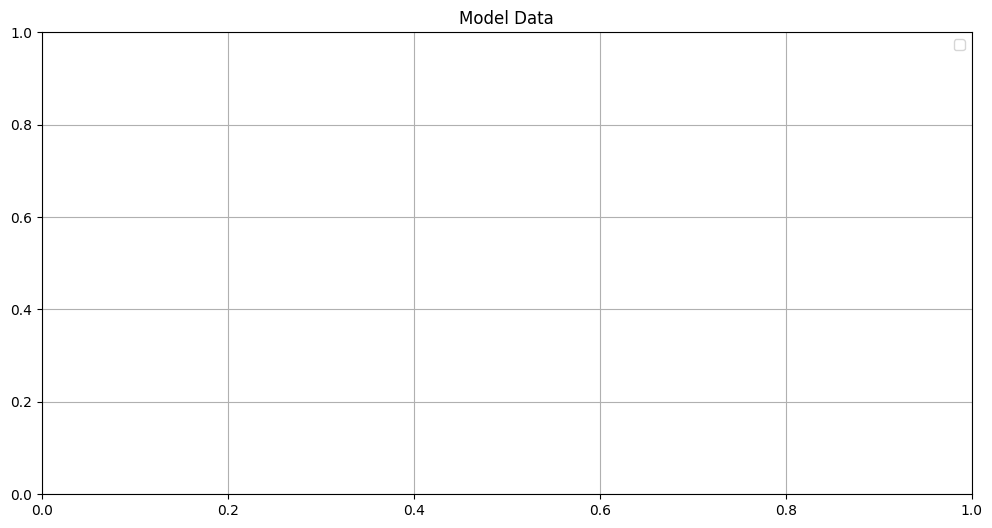

In [8]:
train, test, predict = split_train_and_test_data(data, target)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data')
# plt.plot(train['y'][:, 0])
# plt.plot(test['y'][:, 0, 0])
# plt.plot(predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [9]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [10]:
# x_train.shape, y_train.shape

In [11]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [12]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [13]:
# x_test.shape, y_test.shape

In [14]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [15]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [16]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [17]:
print(train["x"].shape) 
print(train["x"][0])

print(train["y"].shape)
print(train["y"][0])


(4767, 10, 5)
[[0.17  0.171 0.169 0.17  0.16 ]
 [0.166 0.171 0.168 0.17  0.16 ]
 [0.165 0.17  0.167 0.169 0.16 ]
 [0.175 0.169 0.167 0.169 0.16 ]
 [0.175 0.168 0.166 0.169 0.16 ]
 [0.182 0.168 0.167 0.169 0.16 ]
 [0.188 0.169 0.168 0.168 0.16 ]
 [0.186 0.17  0.168 0.168 0.16 ]
 [0.184 0.172 0.169 0.168 0.16 ]
 [0.187 0.174 0.169 0.168 0.16 ]]
(4767,)
0


In [18]:
print(test["x"].shape) 
print(test["x"][0])

print(test["y"].shape)
print(test["y"][0])

(596, 10, 5)
[[0.518 0.533 0.535 0.528 0.511]
 [0.516 0.531 0.535 0.528 0.512]
 [0.519 0.53  0.535 0.529 0.513]
 [0.502 0.527 0.534 0.529 0.513]
 [0.508 0.524 0.533 0.529 0.514]
 [0.511 0.522 0.532 0.529 0.515]
 [0.517 0.521 0.532 0.53  0.516]
 [0.513 0.519 0.531 0.53  0.517]
 [0.509 0.517 0.53  0.531 0.519]
 [0.515 0.516 0.53  0.531 0.52 ]]
(596,)
1


In [19]:
print(predict["x"].shape) 
print(predict["x"][0])

print(predict["y"].shape)
print(predict["y"][0])

(586, 10, 5)
[[0.884 0.907 0.922 0.93  0.933]
 [0.866 0.903 0.921 0.93  0.934]
 [0.865 0.899 0.92  0.93  0.934]
 [0.875 0.896 0.918 0.93  0.935]
 [0.887 0.895 0.918 0.93  0.935]
 [0.889 0.895 0.918 0.931 0.936]
 [0.886 0.894 0.917 0.931 0.937]
 [0.865 0.892 0.915 0.932 0.937]
 [0.866 0.889 0.913 0.932 0.938]
 [0.854 0.885 0.91  0.932 0.938]]
(596,)
0


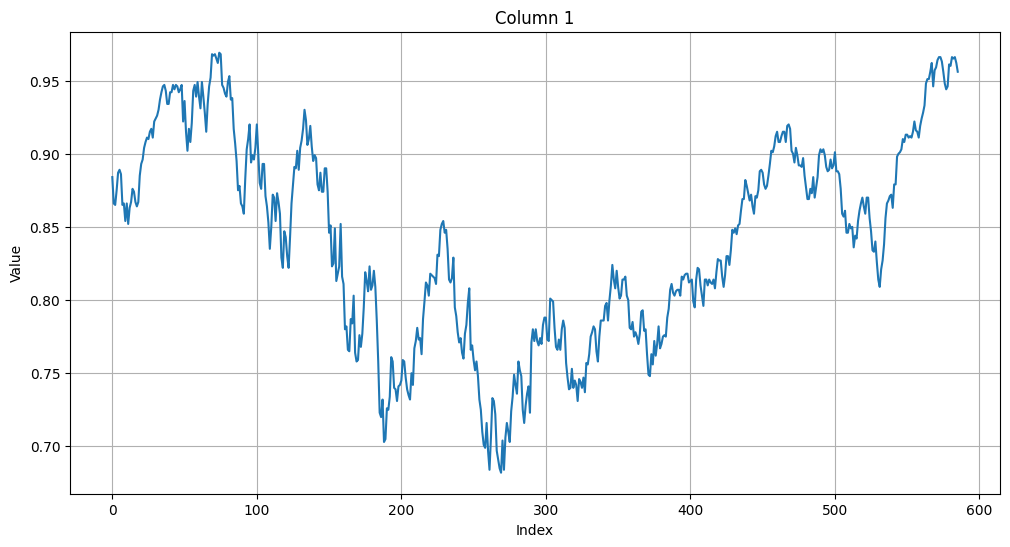

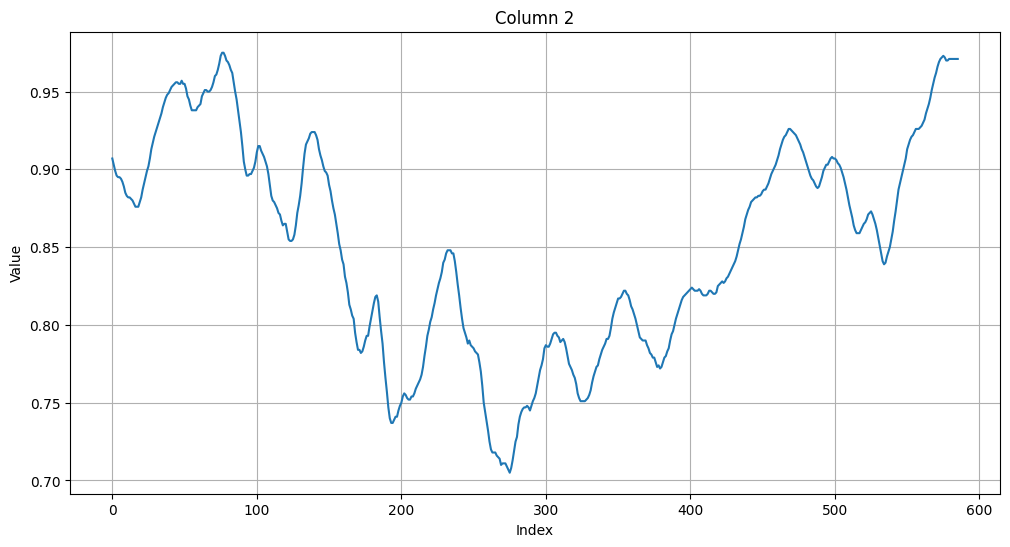

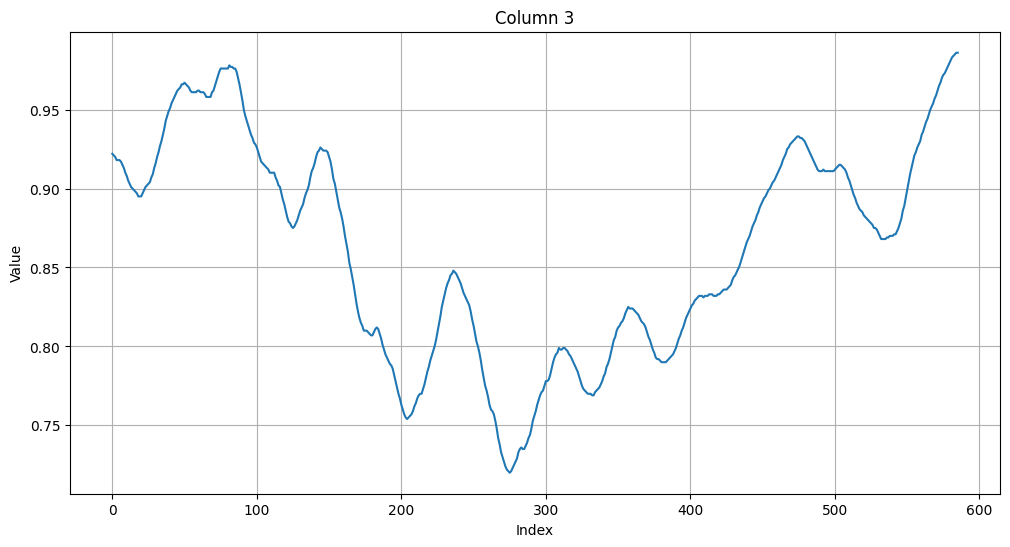

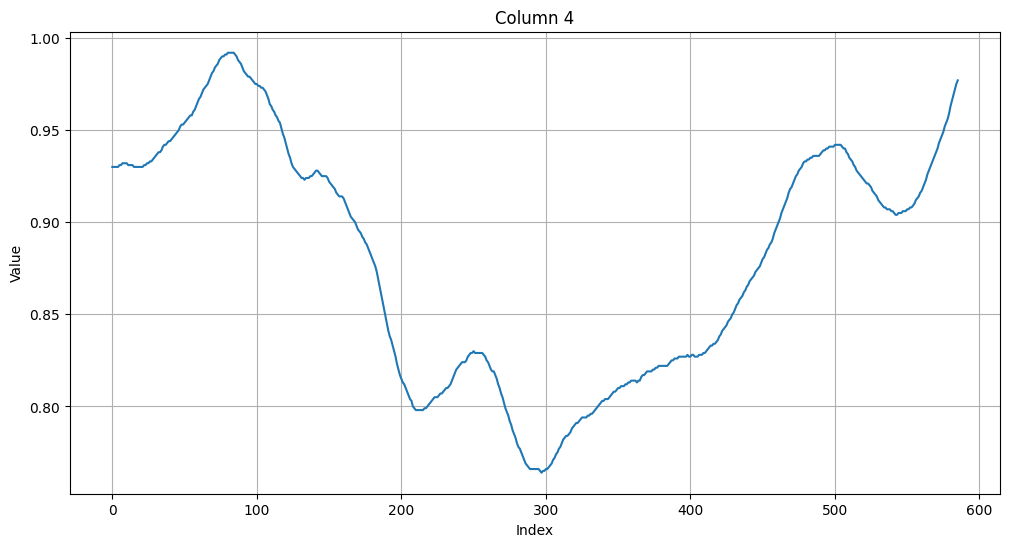

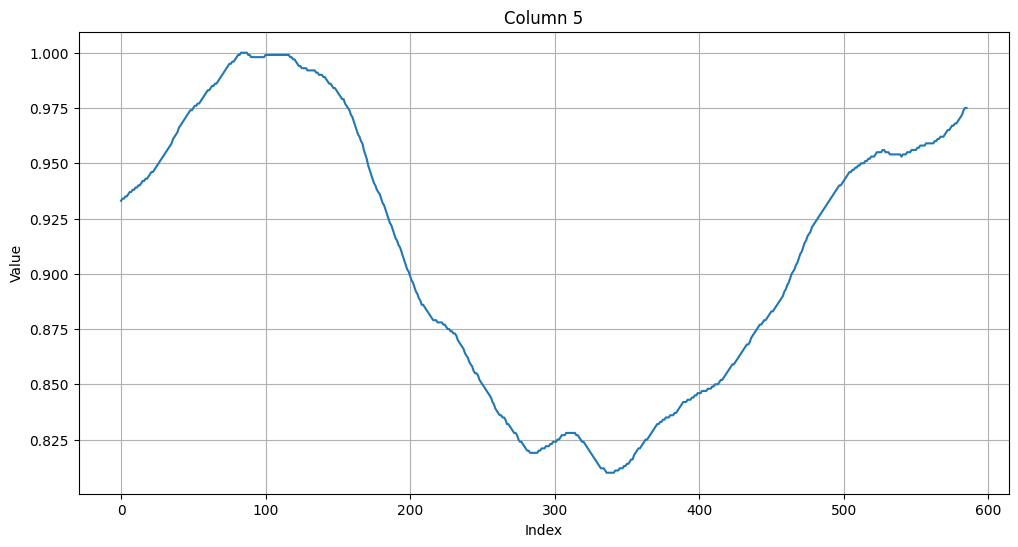

In [20]:
num_columns = data.shape[2]  # Get the number of columns
for i in range(num_columns):
    plt = config_chart('Model Data')
    plt.plot(predict["x"][:, 0, i])
    plt.title(f'Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()